In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Discover and Clean the Data

In [41]:
df = pd.read_csv("festivals.csv", delimiter=";")

In [42]:
df.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_postal_de_la_commune_principale_de_deroulement,code_insee_commune,code_insee_epci_collage_en_valeur,libelle_epci_collage_en_valeur,numero_de_voie,...,sous_categorie_musique,sous_categorie_musique_cnm,sous_categorie_cinema_et_audiovisuel,sous_categorie_arts_visuels_et_arts_numeriques,sous_categorie_livre_et_litterature,periode_principale_de_deroulement_du_festival,identifiant_agence_a,identifiant,geocodage_xy,identifiant_cnm
0,Illustr'action,Intercommunale,Auvergne-Rhône-Alpes,Ardèche,Alboussière,7440,7007,200041366,CC Rhône Crussol,NaN,...,NaN,NaN,NaN,NaN,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_07007_122,"44.9397584607, 4.73413213329",NaN
1,Festival international de viole de gambe,NaN,Grand Est,Ardennes,Asfeld,8190,8024,200043156,CC du Pays Rethélois,NaN,...,NaN,NaN,NaN,NaN,NaN,Saison (21 juin - 5 septembre),NaN,FEST_08024_391,"49.473325858, 4.12377173054",NaN
2,Festival des mardis marionnettes,NaN,Provence-Alpes-Côte d'Azur,Alpes-Maritimes,Biot,6403,6018,240600585,CA de Sophia Antipolis,NaN,...,NaN,NaN,NaN,NaN,NaN,Saison (21 juin - 5 septembre),NaN,FEST_06018_831,"43.6276558141, 7.08318612891",NaN
3,L'esprit du Piano,NaN,Nouvelle-Aquitaine,Gironde,Bordeaux,33000,33063,243300316,Bordeaux Métropole,NaN,...,Musiques classiques et savantes,"11- Musique classique, lyrique, contemporaine,...",NaN,NaN,NaN,Après-saison (6 septembre - 31 décembre),LA167,FEST_33063_918,"44.8572445351, -0.57369678116",3101.0
4,Biennale en Revermont,NaN,Auvergne-Rhône-Alpes,Ain,Ceyzériat,1250,1072,200071751,CA du Bassin de Bourg-en-Bresse,NaN,...,Musiques diverses,NaN,NaN,NaN,NaN,Avant-saison (1er janvier - 20 juin),NaN,FEST_01072_1385,"46.1832170988, 5.32007207542",NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7283 entries, 0 to 7282
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   nom_du_festival                                      7283 non-null   object 
 1   envergure_territoriale                               1899 non-null   object 
 2   region_principale_de_deroulement                     7283 non-null   object 
 3   departement_principal_de_deroulement                 7257 non-null   object 
 4   commune_principale_de_deroulement                    7257 non-null   object 
 5   code_postal_de_la_commune_principale_de_deroulement  7266 non-null   object 
 6   code_insee_commune                                   7282 non-null   object 
 7   code_insee_epci_collage_en_valeur                    7247 non-null   object 
 8   libelle_epci_collage_en_valeur                       7247 non-null  

In [43]:
df.dropna(thresh=len(df.columns) - 20, inplace=True)  


df.drop_duplicates(inplace=True)



I'm looking at the values that are missing the most and I'm deleting the columns where we have the most missing values

In [44]:
print(df.isnull().sum())

nom_du_festival                                           0
envergure_territoriale                                 5384
region_principale_de_deroulement                          0
departement_principal_de_deroulement                     24
commune_principale_de_deroulement                        24
code_postal_de_la_commune_principale_de_deroulement      15
code_insee_commune                                        1
code_insee_epci_collage_en_valeur                        34
libelle_epci_collage_en_valeur                           34
numero_de_voie                                         5076
type_de_voie_rue_avenue_boulevard_etc                  4409
nom_de_la_voie                                         3780
adresse_postale                                        3769
complement_d_adresse_facultatif                        5079
site_internet_du_festival                               725
adresse_e_mail                                         1702
decennie_de_creation_du_festival        

In [45]:
df = df.drop(columns=['code_insee_epci_collage_en_valeur', 'complement_d_adresse_facultatif', 'sous_categorie_musique_cnm','sous_categorie_cinema_et_audiovisuel','sous_categorie_arts_visuels_et_arts_numeriques','sous_categorie_livre_et_litterature','identifiant_agence_a','identifiant_cnm','sous_categorie_spectacle_vivant','numero_de_voie','envergure_territoriale','sous_categorie_musique'])

In [46]:
print(df.isnull().sum())

nom_du_festival                                           0
region_principale_de_deroulement                          0
departement_principal_de_deroulement                     24
commune_principale_de_deroulement                        24
code_postal_de_la_commune_principale_de_deroulement      15
code_insee_commune                                        1
libelle_epci_collage_en_valeur                           34
type_de_voie_rue_avenue_boulevard_etc                  4409
nom_de_la_voie                                         3780
adresse_postale                                        3769
site_internet_du_festival                               725
adresse_e_mail                                         1702
decennie_de_creation_du_festival                        367
annee_de_creation_du_festival                          1446
discipline_dominante                                      0
periode_principale_de_deroulement_du_festival            60
identifiant                             

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7281 entries, 0 to 7282
Data columns (total 18 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   nom_du_festival                                      7281 non-null   object 
 1   region_principale_de_deroulement                     7281 non-null   object 
 2   departement_principal_de_deroulement                 7257 non-null   object 
 3   commune_principale_de_deroulement                    7257 non-null   object 
 4   code_postal_de_la_commune_principale_de_deroulement  7266 non-null   object 
 5   code_insee_commune                                   7280 non-null   object 
 6   libelle_epci_collage_en_valeur                       7247 non-null   object 
 7   type_de_voie_rue_avenue_boulevard_etc                2872 non-null   object 
 8   nom_de_la_voie                                       3501 non-null   obje

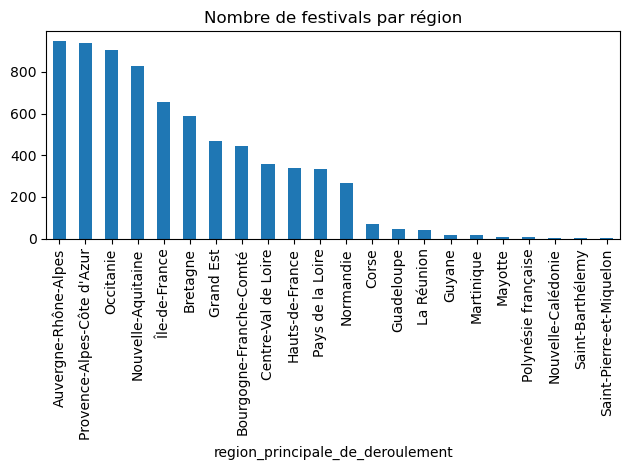

In [47]:
# Visualisation du nombre de festivals par région
fig, ax = plt.subplots()
df['region_principale_de_deroulement'].value_counts().plot(kind='bar', ax=ax)
plt.title('Nombre de festivals par région')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [54]:
df_region_count = df['region_principale_de_deroulement'].value_counts().reset_index()
df_region_count.columns = ['region_principale_de_deroulement', 'count']  # Renommer les colonnes

# Visualisation interactive du nombre de festivals par région
fig = px.bar(df_region_count,
             x='region_principale_de_deroulement', y='count',
             labels={'region_principale_de_deroulement': 'Région', 'count': 'Nombre de festivals'},
             title='Nombre de festivals par région')

fig.show()


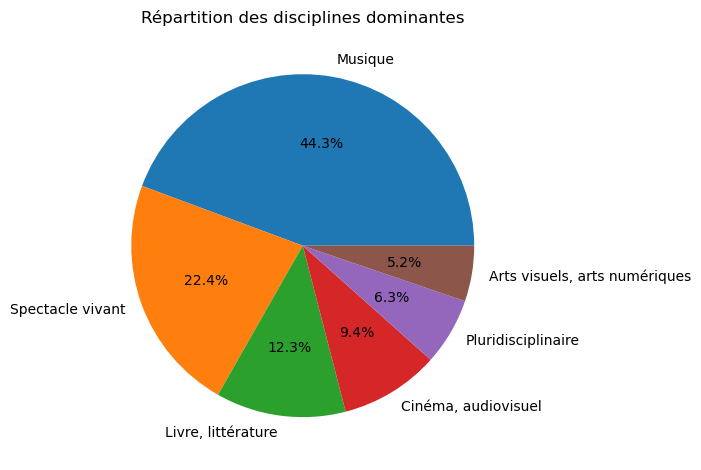

In [48]:
fig, ax = plt.subplots()
df['discipline_dominante'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
plt.title('Répartition des disciplines dominantes')
plt.ylabel('')  # Pour retirer le label de l'axe Y dans un pie chart
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


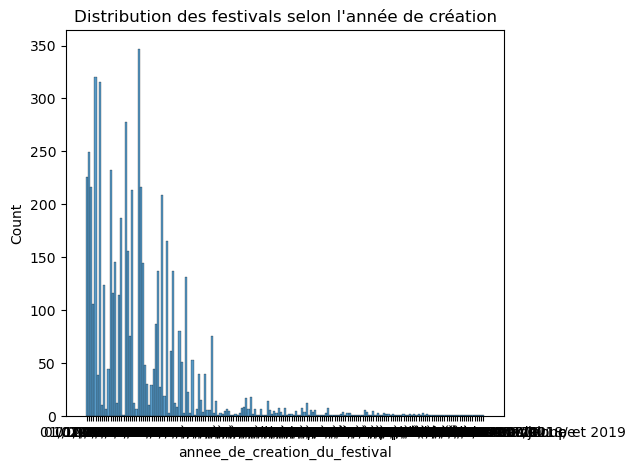

In [49]:
fig, ax = plt.subplots()
sns.histplot(df['annee_de_creation_du_festival'].dropna(), bins=20, ax=ax)
plt.title('Distribution des festivals selon l\'année de création')
plt.tight_layout()
plt.show()